<a href="https://colab.research.google.com/github/sanajokar9001/NeuralNetworksHeart/blob/main/FASHIONMNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow_datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train[1000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 30, 30, 1)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 16, 16, 32)        0         
 ing2D)                                                          
                                                        

In [ ]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
history = model.fit(X_train, y_train_ohe, epochs=10, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/10
200/200 [==============================] - 94s 466ms/step - loss: 1.8963 - accuracy: 0.6827 - val_loss: 0.4593 - val_accuracy: 0.8391
Epoch 2/10
200/200 [==============================] - 88s 442ms/step - loss: 0.5339 - accuracy: 0.8057 - val_loss: 0.3766 - val_accuracy: 0.8668
Epoch 3/10
200/200 [==============================] - 88s 441ms/step - loss: 0.4589 - accuracy: 0.8306 - val_loss: 0.3498 - val_accuracy: 0.8707
Epoch 4/10
200/200 [==============================] - 90s 449ms/step - loss: 0.4152 - accuracy: 0.8476 - val_loss: 0.3396 - val_accuracy: 0.8772
Epoch 5/10
200/200 [==============================] - 91s 454ms/step - loss: 0.3862 - accuracy: 0.8577 - val_loss: 0.3232 - val_accuracy: 0.8836
Epoch 6/10
200/200 [==============================] - 90s 450ms/step - loss: 0.3695 - accuracy: 0.8644 - val_loss: 0.3077 - val_accuracy: 0.8882
Epoch 7/10
200/200 [==============================] - 90s 452ms/step - loss: 0.3514 - accuracy: 0.8696 - val_loss: 0.2946 - val_ac

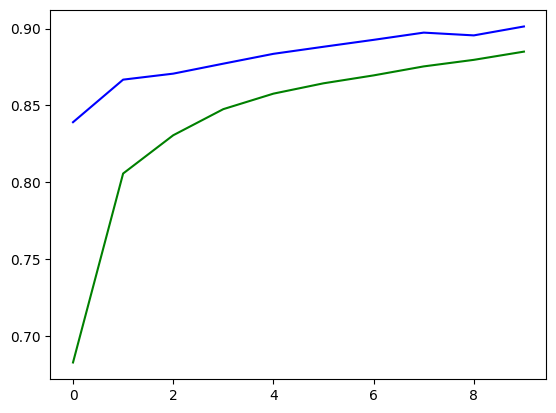

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')

In [ ]:
model.save('sannaz.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
